<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept Drift and Model Generalization

This notebook will cover overfitting, underfitting, and concept drift in machine learning with examples.


## 1. Introduction to Overfitting and Underfitting

In machine learning, **overfitting** occurs when a model is too complex, capturing noise in the training data instead of the general pattern. **Underfitting** occurs when a model is too simple and cannot capture the data's underlying trend.


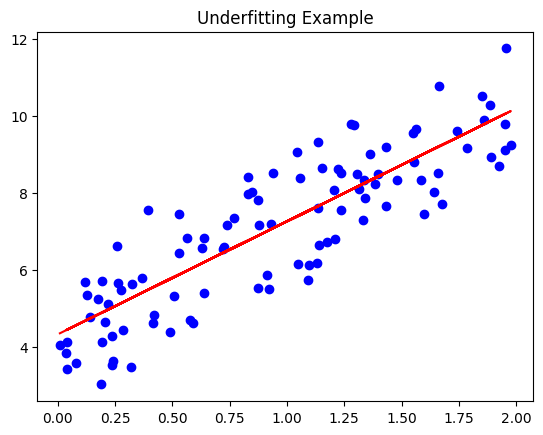

In [1]:
# Example: Simple Linear Regression to show Overfitting and Underfitting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Visualize
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X), color='red')
plt.title('Underfitting Example')
plt.show()

## 2. Handling Overfitting

Techniques like regularization and cross-validation help manage overfitting.


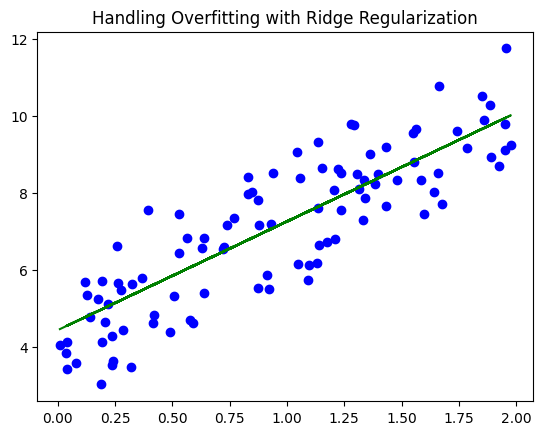

In [2]:
# Example: Applying L2 Regularization (Ridge Regression)
from sklearn.linear_model import Ridge

# Ridge regression model
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, ridge_reg.predict(X), color='green')
plt.title('Handling Overfitting with Ridge Regularization')
plt.show()

## 3. Handling Underfitting

We can handle underfitting by increasing model complexity or adding features.


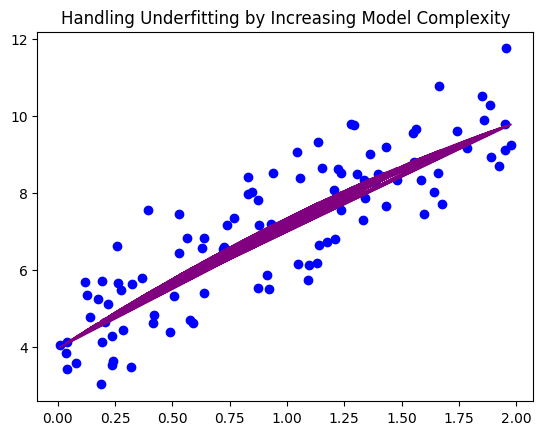

In [3]:
# Example: Polynomial Features to increase model complexity
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg_poly.predict(X_poly), color='purple')
plt.title('Handling Underfitting by Increasing Model Complexity')
plt.show()

## 4. Introduction to Concept Drift

**Concept Drift** occurs when the statistical properties of the target variable change over time, causing model performance to degrade.


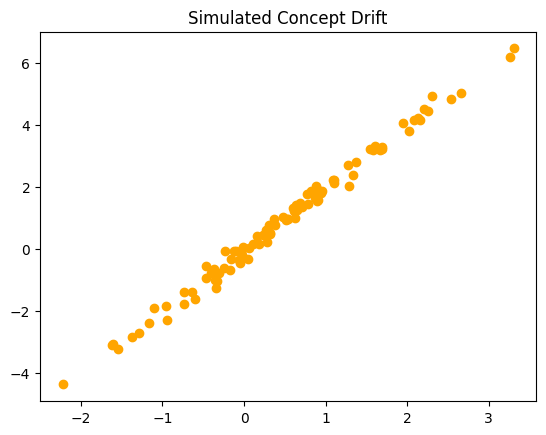

In [4]:
# Simulating Concept Drift by creating a dataset with changing distributions
X1 = np.random.normal(0, 1, (50, 1))
y1 = 2 * X1 + np.random.normal(0, 0.2, (50, 1))

X2 = np.random.normal(1, 1, (50, 1))
y2 = 2 * X2 + np.random.normal(0, 0.2, (50, 1))

# Combine to simulate drift
X_drift = np.vstack((X1, X2))
y_drift = np.vstack((y1, y2))

# Plot
plt.scatter(X_drift, y_drift, color='orange')
plt.title('Simulated Concept Drift')
plt.show()

## 5. Methods to Handle Concept Drift

We can handle concept drift by retraining the model regularly, using online learning, or using a sliding window of recent data.


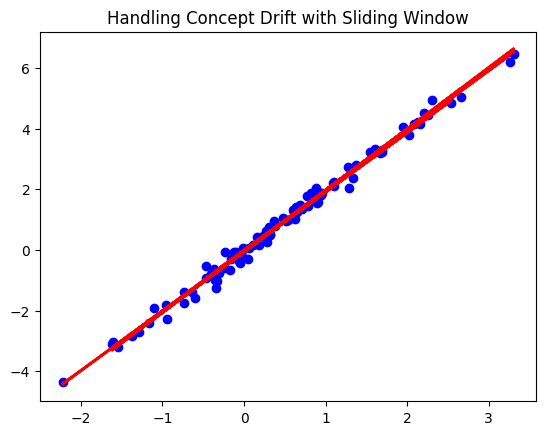

In [5]:
# Example: Using a Sliding Window to adapt to Concept Drift
window_size = 30

def sliding_window_model(X_data, y_data, window_size):
    for i in range(len(X_data) - window_size + 1):
        X_window = X_data[i:i + window_size]
        y_window = y_data[i:i + window_size]

        model = LinearRegression()
        model.fit(X_window, y_window)
        plt.plot(X_window, model.predict(X_window), color='red')

    plt.scatter(X_data, y_data, color='blue')
    plt.title('Handling Concept Drift with Sliding Window')
    plt.show()

# Run sliding window model
sliding_window_model(X_drift, y_drift, window_size)